# PREPROCESSING

NOTE : This will not have any effect on the dataset. It has already been scaled.

In [1]:
%matplotlib inline

import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [2]:
tracks = pd.read_csv("tracks.csv", index_col="trackid")
albums = pd.read_csv("albums.csv", index_col="albumid")

In [3]:
tracks.describe()

,danceability,energy,key,valence,mode,tempo,speechiness,loudness,instrumentalness,acousticness,time_signature,liveness,sent,sent_magn
count,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3892.000000,3892.000000
mean,0.531763,0.605178,0.466017,0.565662,0.784047,0.518314,0.062362,0.666821,0.110764,0.299116,0.780303,0.188860,0.506312,0.006033
std,0.156972,0.239385,0.319563,0.255829,0.411534,0.120759,0.062430,0.099733,0.240307,0.300738,0.078478,0.178912,0.169508,0.035806
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.423118,0.427136,0.181818,0.364467,1.000000,0.431049,0.034745,0.612565,0.000000,0.026131,0.800000,0.075820,0.444444,0.001654
50%,0.536585,0.625126,0.454545,0.582741,1.000000,0.513962,0.043431,0.679963,0.001014,0.186935,0.800000,0.115779,0.500000,0.002856
75%,0.641039,0.807035,0.818182,0.782741,1.000000,0.589135,0.064061,0.736031,0.049696,0.541206,0.800000,0.248975,0.611111,0.004885
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
albums.describe()

,Year,rating,popularity,danceability_mean,danceability_std,energy_mean,energy_std,tempo_mean,tempo_std,valence_mean,...,acousticness_mean,acousticness_std,liveness_mean,liveness_std,key_mean,key_std,time_signature_mean,time_signature_std,sent_magn_mean,sent_magn_std
count,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,...,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,3.320000e+02,332.000000,332.000000
mean,1978.075301,0.771050,0.659372,0.529463,0.121634,0.602155,0.173798,0.518409,0.110120,0.561289,...,0.293009,0.202040,0.187364,0.133002,0.469529,0.311001,0.780989,5.260097e-02,0.006140,0.006130
std,11.047155,0.136597,0.201916,0.099118,0.036907,0.165946,0.053337,0.049316,0.031883,0.145517,...,0.205343,0.094000,0.107495,0.071117,0.106285,0.055613,0.024183,5.425534e-02,0.023031,0.025684
min,1956.000000,0.000000,0.000000,0.240721,0.042546,0.161078,0.022217,0.405651,0.028976,0.178865,...,0.000144,0.000365,0.052547,0.018388,0.227273,0.080174,0.700000,0.000000e+00,0.000701,0.000520
25%,1970.000000,0.684286,0.544304,0.458679,0.096836,0.486585,0.135059,0.488348,0.086552,0.465598,...,0.127305,0.142932,0.121445,0.079891,0.386364,0.279286,0.766667,1.170278e-16,0.002258,0.001127
50%,1975.000000,0.788571,0.696203,0.531192,0.116950,0.607583,0.173610,0.515682,0.110737,0.567670,...,0.263271,0.217543,0.164902,0.117158,0.466721,0.312094,0.785714,5.773503e-02,0.003039,0.001644
75%,1985.000000,0.874286,0.810127,0.595981,0.143966,0.731832,0.211124,0.545965,0.133564,0.671599,...,0.453199,0.269630,0.220804,0.181831,0.536472,0.345620,0.800000,8.090398e-02,0.005356,0.002803
max,2011.000000,1.000000,1.000000,0.791210,0.283019,0.975126,0.328850,0.716497,0.194671,0.930795,...,0.885153,0.430900,0.896414,0.396004,0.831169,0.460566,0.828571,2.163636e-01,0.375197,0.243000


## TRACKS

In [5]:
tracks.columns

Index(['albumid', 'name', 'danceability', 'energy', 'key', 'valence', 'mode',
       'tempo', 'speechiness', 'loudness', 'instrumentalness', 'acousticness',
       'time_signature', 'liveness', 'sent', 'sent_magn'],
      dtype='object')

In [6]:
feats = ['danceability', 'energy', 'key', 'valence', 'mode',
       'tempo', 'speechiness', 'loudness', 'instrumentalness', 'acousticness',
       'time_signature', 'liveness']

for feat in feats:
    scaler = MinMaxScaler()
    scaler.fit(tracks[feat].values.reshape(-1,1))
    tracks[feat] = scaler.transform(tracks[feat].values.reshape(-1,1))

In [7]:
tracks.describe()

,danceability,energy,key,valence,mode,tempo,speechiness,loudness,instrumentalness,acousticness,time_signature,liveness,sent,sent_magn
count,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3892.000000,3892.000000
mean,0.531763,0.605178,0.466017,0.565662,0.784047,0.518314,0.062362,0.666821,0.110764,0.299116,0.780303,0.188860,0.506312,0.006033
std,0.156972,0.239385,0.319563,0.255829,0.411534,0.120759,0.062430,0.099733,0.240307,0.300738,0.078478,0.178912,0.169508,0.035806
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.423118,0.427136,0.181818,0.364467,1.000000,0.431049,0.034745,0.612565,0.000000,0.026131,0.800000,0.075820,0.444444,0.001654
50%,0.536585,0.625126,0.454545,0.582741,1.000000,0.513962,0.043431,0.679963,0.001014,0.186935,0.800000,0.115779,0.500000,0.002856
75%,0.641039,0.807035,0.818182,0.782741,1.000000,0.589135,0.064061,0.736031,0.049696,0.541206,0.800000,0.248975,0.611111,0.004885
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 'sent' field

In [8]:
scaler = MinMaxScaler()
sent_values = tracks.sent.dropna().values.reshape(-1,1)
scaler.fit(sent_values)
sent_values_scaled = scaler.transform(sent_values)
tracks['sent_scaled'] = None

for i, row in tracks.iterrows():
    sent_value = row['sent']
    if not pd.isnull(sent_value) and sent_value in sent_values:
        index_of = sent_values.reshape(-1).tolist().index(sent_value)
        sent_value_scaled = sent_values_scaled[index_of][0]
        tracks.loc[i, 'sent_scaled'] = sent_value_scaled

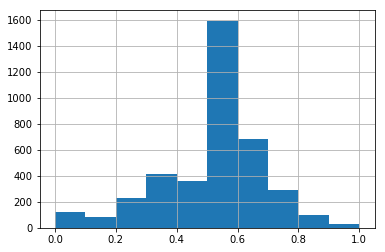

In [9]:
tracks.sent.hist()

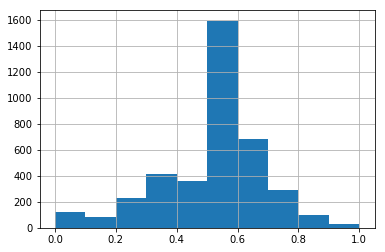

In [10]:
tracks.sent_scaled.hist()

In [11]:
tracks['sent'] = tracks['sent_scaled']
del tracks['sent_scaled']

### 'sent_magn' field

In [12]:
scaler = MinMaxScaler()
sent_magn_values = tracks.sent_magn.dropna().values.reshape(-1,1)
scaler.fit(sent_magn_values)
sent_magn_values_scaled = scaler.transform(sent_magn_values)
tracks['sent_magn_scaled'] = None

for i, row in tracks.iterrows():
    sent_magn_value = row['sent_magn']
    if not pd.isnull(sent_magn_value) and sent_magn_value in sent_magn_values:
        index_of = sent_magn_values.reshape(-1).tolist().index(sent_magn_value)
        sent_magn_value_scaled = sent_magn_values_scaled[index_of][0]
        tracks.loc[i, 'sent_magn_scaled'] = sent_magn_value_scaled

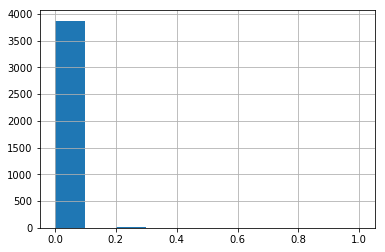

In [13]:
tracks.sent_magn.hist()

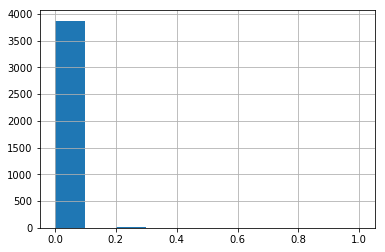

In [14]:
tracks.sent_magn_scaled.hist()

In [15]:
tracks['sent_magn'] = tracks['sent_magn_scaled']
del tracks['sent_magn_scaled']

## ALBUMS

In [16]:
albums.columns

Index(['Year', 'Album', 'Artist', 'Genre', 'Subgenre', 'rating', 'popularity',
       'danceability_mean', 'danceability_std', 'energy_mean', 'energy_std',
       'tempo_mean', 'tempo_std', 'valence_mean', 'valence_std', 'sent_mean',
       'sent_std', 'mode_mean', 'mode_std', 'speechiness_mean',
       'speechiness_std', 'loudness_mean', 'loudness_std',
       'instrumentalness_mean', 'instrumentalness_std', 'acousticness_mean',
       'acousticness_std', 'liveness_mean', 'liveness_std', 'key_mean',
       'key_std', 'time_signature_mean', 'time_signature_std',
       'sent_magn_mean', 'sent_magn_std'],
      dtype='object')

In [17]:
feats = ['rating', 'popularity']

for feat in feats:
    scaler = MinMaxScaler()
    scaler.fit(albums[feat].values.reshape(-1,1))
    albums[feat] = scaler.transform(albums[feat].values.reshape(-1,1))

In [18]:
albums.rating.describe()

count    332.000000
mean       0.771050
std        0.136597
min        0.000000
25%        0.684286
50%        0.788571
75%        0.874286
max        1.000000
Name: rating, dtype: float64

In [19]:
albums.popularity.describe()

count    332.000000
mean       0.659372
std        0.201916
min        0.000000
25%        0.544304
50%        0.696203
75%        0.810127
max        1.000000
Name: popularity, dtype: float64

## BUILD ALBUMS FEATS

In [20]:
feats = ['danceability', 'energy', 'key', 'valence', 'mode',
       'tempo', 'speechiness', 'loudness', 'instrumentalness', 'acousticness',
       'time_signature', 'liveness', 'sent', 'sent_magn']
methods = ['_mean', '_std']

for feat in feats:
    for method in methods:
        new_feat = '%s%s' %(feat, method)
        albums[new_feat] = None

In [21]:
for i, row in albums.iterrows():
    tracks_on_album = tracks[tracks.albumid == i]
    for feat in feats:
        for method in methods:
            new_feat = '%s%s' %(feat, method)
            if method == "_mean":
                value = tracks_on_album[feat].mean()
                albums.loc[i, new_feat] = value
            elif method == "_std":
                value = tracks_on_album[feat].std()
                albums.loc[i, new_feat] = value

In [22]:
albums.columns

Index(['Year', 'Album', 'Artist', 'Genre', 'Subgenre', 'rating', 'popularity',
       'danceability_mean', 'danceability_std', 'energy_mean', 'energy_std',
       'tempo_mean', 'tempo_std', 'valence_mean', 'valence_std', 'sent_mean',
       'sent_std', 'mode_mean', 'mode_std', 'speechiness_mean',
       'speechiness_std', 'loudness_mean', 'loudness_std',
       'instrumentalness_mean', 'instrumentalness_std', 'acousticness_mean',
       'acousticness_std', 'liveness_mean', 'liveness_std', 'key_mean',
       'key_std', 'time_signature_mean', 'time_signature_std',
       'sent_magn_mean', 'sent_magn_std'],
      dtype='object')

In [23]:
albums.head()

,Year,Album,Artist,Genre,Subgenre,rating,popularity,danceability_mean,danceability_std,energy_mean,...,acousticness_mean,acousticness_std,liveness_mean,liveness_std,key_mean,key_std,time_signature_mean,time_signature_std,sent_magn_mean,sent_magn_std
albumid,,,,,,,,,,,,,,,,,,,,,
6b7ycwe2rxq6FkaupNuGoS,1967,Sgt. Pepper's Lonely Hearts Club Band,The Beatles,Rock,"Rock & Roll, Psychedelic Rock",0.920000,0.721519,0.484216,0.1586,0.615153,...,0.226749,0.263797,0.314313,0.294915,0.34965,0.312385,0.738462,0.17097,0.0081635,0.00513627
6GphKx2QAPRoVGWE9D7ou8,1966,Pet Sounds,The Beach Boys,Rock,"Pop Rock, Psychedelic Rock",0.902857,0.873418,0.457052,0.170927,0.561809,...,0.382296,0.242559,0.112547,0.052289,0.594406,0.314076,0.769231,0.0751068,0.00532478,0.00353874
3PRoXYsngSwjEQWR5PsHWR,1966,Revolver,The Beatles,Rock,"Psychedelic Rock, Pop Rock",0.925714,0.810127,0.511589,0.132062,0.530223,...,0.408184,0.353499,0.240266,0.208611,0.448052,0.2907,0.785714,0.0534522,0.00705428,0.00324721
6YabPKtZAjxwyWbuO9p4ZD,1965,Highway 61 Revisited,Bob Dylan,Rock,"Folk Rock, Blues Rock",0.902857,0.822785,0.474608,0.0782795,0.6689,...,0.668677,0.133462,0.241689,0.128753,0.515152,0.433609,0.8,1.17757e-16,0.0106059,0.00797007
50o7kf2wLwVmOTVYJOTplm,1965,Rubber Soul,The Beatles,"Rock, Pop",Pop Rock,0.891429,0.835443,0.623315,0.100623,0.539052,...,0.151543,0.234265,0.0848946,0.0645846,0.38961,0.286213,0.785714,0.0534522,0.00849842,0.00412736


In [24]:
tracks.to_csv("tracks.csv", encoding="utf8")
albums.to_csv("albums.csv", encoding="utf8")